# Exercise 6

Name: B.S.V.W. Munasinghe

Index Number: 190397E

In [1]:
#Importing Libraries
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
import cv2 as cv
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

# Hough Transforms

# 1)

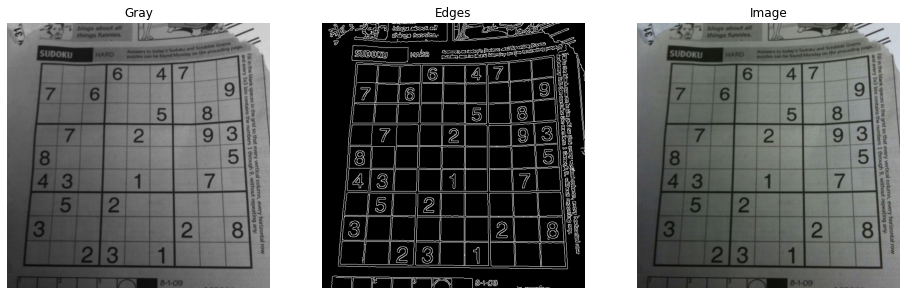

In [42]:
img = cv.imread('sudoku.png',cv.IMREAD_COLOR) 
assert img is not None
 
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray,20,120,apertureSize=3)
lines = cv.HoughLines(edges,1,np.pi/180,200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0,y0 = a*rho,b*rho
    x1,y1 = int(x0 + 1000*(-b)),int(y0 + 1000*(a))
    x2,y2 = int(x0 + 1000*(-b)),int(y0 + 1000*(a))
    
    cv.line(img,(x1,y1),(x2,y2),(0,0,225),2)
cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)

cv.imshow('Image',gray)
cv.waitKey(0)
cv.imshow('Image',edges)
cv.waitKey(0)
cv.imshow('Image',img)
cv.waitKey(0)
cv.destroyAllWindows()

#display using matplotlib
fig,ax = plt.subplots(1,3,figsize=(16,16))
f1 = cv.cvtColor(gray,cv.COLOR_BGR2RGB)
f2 = cv.cvtColor(edges,cv.COLOR_BGR2RGB)
f3 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title("Gray")
ax[1].set_title("Edges")
ax[2].set_title("Image")
ax[0].imshow(f1)
ax[1].imshow(f2)
ax[2].imshow(f3)

# 2)

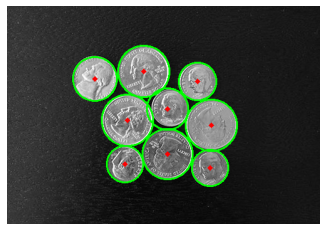

In [51]:
img = cv.imread('coins.jpg',cv.IMREAD_COLOR) 
assert img is not None
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

cimg = cv.cvtColor(gray,cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,65,param1=155,param2=20,minRadius=21,maxRadius=49)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',cimg)
cv.waitKey(0)
cv.destroyAllWindows()

#display using matplotlib
fig,ax = plt.subplots()
f_ = cv.cvtColor(cimg,cv.COLOR_BGR2RGB)
ax.axis('off')
ax.imshow(f_)

# 3)

x=29.0,y=109.0,orientation=1.0,p1=0.0,p2=(4, 76)


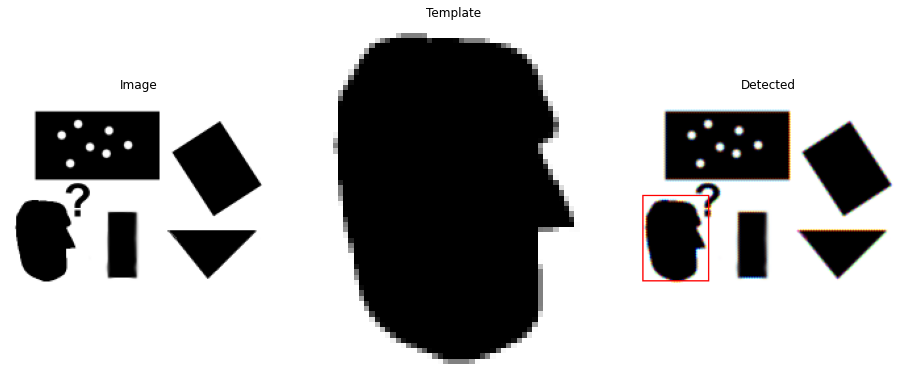

In [43]:
img = cv.imread("pic1.png",cv.IMREAD_REDUCED_GRAYSCALE_2)
temp1 = cv.imread("templ.png",cv.IMREAD_REDUCED_GRAYSCALE_2)
im_edges= cv.Canny(img,50,250)
temp1_edges = cv.Canny(temp1,50,250)

alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(temp1_edges)
alg.setAngleThresh(100000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions,votes = alg.detect(im_edges)

out = cv.cvtColor(img,cv.COLOR_BAYER_BG2BGR)
for x,y,scale,orientation in positions[0]:
    halfHeight = temp1.shape[0]/2.*scale
    halfWidth = temp1.shape[1]/2.*scale
    p1 = (int(x-halfWidth),int(y-halfHeight))
    p2 = (int(x+halfWidth),int(y+halfHeight))
    print("x={},y={},orientation={},p1={},p2={}".format(x,y,scale,orientation,p1,p2))
    cv.rectangle(out,p1,p2,(0,0,255))
    


fig,ax = plt.subplots(1,3,figsize=(16,16))
f1 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
f2 = cv.cvtColor(temp1,cv.COLOR_BGR2RGB)
f3 = cv.cvtColor(out,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title("Image")
ax[1].set_title("Template")
ax[2].set_title("Detected")
ax[0].imshow(f1)
ax[1].imshow(f2)
ax[2].imshow(f3)

# Alignment

# 4)

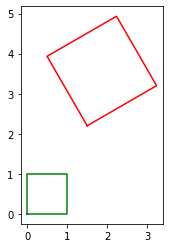

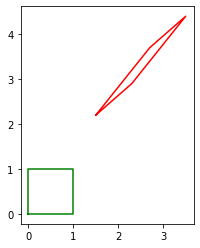

In [39]:
a,b,c,d = [0,0,1],[0,1,1],[1,1,1],[1,0,1]

X = np.array([a,b,c,d]).T

theta = np.pi*30/180
s = 2
tx,ty = 1.5,2.2

H = np.array([[s*np.cos(theta),-s*np.sin(theta),tx],[s*np.sin(theta),s*np.cos(theta),ty],[0,0,1]])
Y = H @ X

a11,a12,a21,a22 = 0.8,1.2,0.7,1.5
A = np.array([[a11,a12,tx],[a21,a22,ty],[0,0,1]])

Y1 = A @ X

x = np.append(X[0,:],X[0,0])
y = np.append(X[1,:],X[1,0])
fig,ax = plt.subplots(1,1)
ax.plot(x,y,color='g')
ax.set_aspect('equal')

x = np.append(Y[0,:],Y[0,0])
y = np.append(Y[1,:],Y[1,0])
ax.plot(x,y,color='r')
ax.set_aspect('equal')

x = np.append(X[0,:],X[0,0])
y = np.append(X[1,:],X[1,0])
fig,ax = plt.subplots(1,1)
ax.plot(x,y,color='g')
ax.set_aspect('equal')

x = np.append(Y1[0,:],Y1[0,0])
y = np.append(Y1[1,:],Y1[1,0])
ax.plot(x,y,color='r')
ax.set_aspect('equal')

# 5)

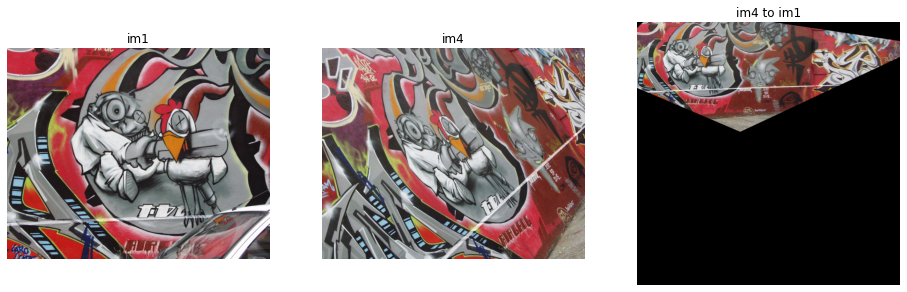

In [44]:
im1 = cv.imread("graf/img1.ppm",cv.IMREAD_ANYCOLOR)
im4 = cv.imread("graf/img4.ppm",cv.IMREAD_ANYCOLOR)

H = np.array([[   6.6378505e-01 ,  6.8003334e-01 , -3.1230335e+01],[-1.4495500e-01 ,  9.7128304e-01 ,  1.4877420e+02],[   4.2518504e-04 , -1.3930359e-05  , 1.0000000e+00]])

im1to4 = cv.warpPerspective(im4,np.linalg.inv(H),(2000,2000))
#display using matplotlib
fig,ax = plt.subplots(1,3,figsize=(16,16))
f1 = cv.cvtColor(im1,cv.COLOR_BGR2RGB)
f2 = cv.cvtColor(im4,cv.COLOR_BGR2RGB)
f3 = cv.cvtColor(im1to4,cv.COLOR_BGR2RGB)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title("im1")
ax[1].set_title("im4")
ax[2].set_title("im4 to im1")
ax[0].imshow(f1)
ax[1].imshow(f2)
ax[2].imshow(f3)